In [15]:
import numpy as np
import tensorflow as tf 
import csv
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [2]:
data2 =  pd.read_csv('data_t2.csv')
data2 = shuffle(data2)
data2.shape

(2874, 1202)

In [24]:
train, test =train_test_split(data2, test_size=0.2)

train = np.asarray(train)
test = np.asarray(test)

xtr = train[:, 0:1200]
ytr = train[:, 1201]

xts = test[:, 0:1200]
yts = test[:, 1201]

full_feat = xtr.shape[1]
red_scale = 10
red_feat = full_feat/red_scale

In [25]:
xtrsp = np.hsplit(xtr,red_scale)
xtssp = np.hsplit(xts,red_scale)

In [26]:
xtrs = np.asarray([np.mean(xtrsp[i],axis =1) for i in range (red_scale)]).T
xtss = np.asarray([np.mean(xtssp[i],axis =1) for i in range (red_scale)]).T

In [27]:
tr_mean = np.mean(xtrs, axis=0)
tr_std = np.std(xtrs, axis = 0,dtype=np.float64)
xtr_p = (xtrs - tr_mean[None,:])/tr_std[None,:]

ts_mean = np.mean(xtss, axis=0)
ts_std = np.std(xtss, axis = 0,dtype=np.float64)
xts_p = (xtss - ts_mean[None,:])/ts_std[None,:]

n_classes = 4
n_labels= np.unique(ytr)

label_binarizer = sklearn.preprocessing.LabelEncoder()
label_binarizer.fit(n_labels)

yohtr = label_binarizer.transform(ytr)
yohts = label_binarizer.transform(yts)

In [28]:
rf_class = RandomForestClassifier(n_estimators=1000)
pred_rf = rf_class.fit(xtr_p, yohtr).predict(xts_p)
accuracy_score(yohts, pred_rf)

0.33565217391304347

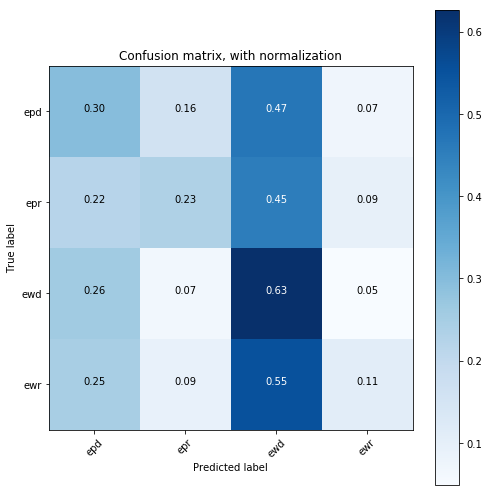

In [29]:
cnf_matrix1 = confusion_matrix(yts, label_binarizer.inverse_transform(pred_rf))
np.set_printoptions(precision=2)

plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix1,normalize=True, classes=n_labels,title='Confusion matrix, with normalization')
plt.show()

In [15]:
# knn_class = KNeighborsClassifier()
# pred_kn = knn_class.fit(xtrs, ytr).predict(xtss)
# accuracy_score(yts, pred_kn)

0.29565217391304349